In [5]:
#!cp .././../../data/bankdata/bank-additional/bank-additional-full.csv .././../../data/bankdata/banking.csv
#ls -ltr .././../../data/bankdata
#!wc -l .././../../data/bankdata/banking.csv

41189 .././../../data/bankdata/banking.csv


In [37]:
import pandas as pd
import numpy as np

In [39]:
data_path = '.././../../data/bankdata/'

In [40]:
df = pd.read_csv(data_path + 'banking.csv', sep = ';')
print(df.shape)
df.head()

(41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [41]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [42]:
df1 = df.copy()

In [51]:
#df1['y'].isnull().values.any()
df1.isnull().values.any()

False

In [46]:
df1['target'] = df1.y.map(dict(yes=1, no=0)).apply(np.int64)

In [49]:
df1 = df1.drop('y', axis = 1)

In [56]:
df1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [54]:
print(df1['housing'].unique())
print(df1['loan'].unique())
print(df1['housing'].value_counts())
print(df1['loan'].value_counts())

['no' 'yes' 'unknown']
['no' 'yes' 'unknown']
yes        21576
no         18622
unknown      990
Name: housing, dtype: int64
no         33950
yes         6248
unknown      990
Name: loan, dtype: int64


In [55]:
# df1['housing'] = df1.housing.map(dict(yes=1, no=0)).apply(np.int64)
# df1['loan'] = df1.loan.map(dict(yes=1, no=0)).apply(np.int64)

In [59]:
features = ['age', 'duration', 'campaign', 'previous', 'emp.var.rate', 'nr.employed']

In [61]:
processed_data = df1[features]

In [69]:
target = df1['target']

In [62]:
processed_data.shape

(41188, 6)

In [63]:
processed_data.head()

,age,duration,campaign,previous,emp.var.rate,nr.employed
0,56,261,1,0,1.1,5191.0
1,57,149,1,0,1.1,5191.0
2,37,226,1,0,1.1,5191.0
3,40,151,1,0,1.1,5191.0
4,56,307,1,0,1.1,5191.0


In [68]:
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(processed_data, target, train_size=0.70, test_size=0.30, random_state=1)

In [72]:
from sklearn.preprocessing import StandardScaler

In [74]:
scaler = StandardScaler()
features_standardized = scaler.fit_transform(X_train)

In [76]:
from sklearn.linear_model import LogisticRegression

In [77]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [91]:
features_standardized_test = scaler.fit_transform(X_test)

In [92]:
y_hat = model.predict(features_standardized_test)

In [93]:
from sklearn.metrics import roc_auc_score

In [94]:
auc = roc_auc_score(y_test, y_hat)

In [95]:
auc

0.7168468543971392

In [96]:
from sklearn.metrics import confusion_matrix

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

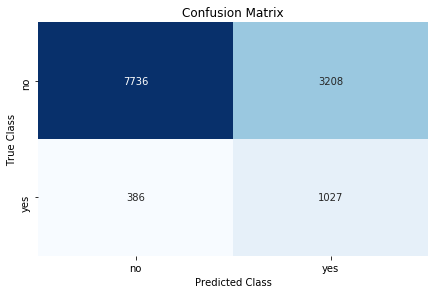

In [107]:
class_names = ['no', 'yes']
matrix = confusion_matrix(y_test, y_hat)
# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()